<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/single_hidden_layer_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Hidden Layer Neural Network


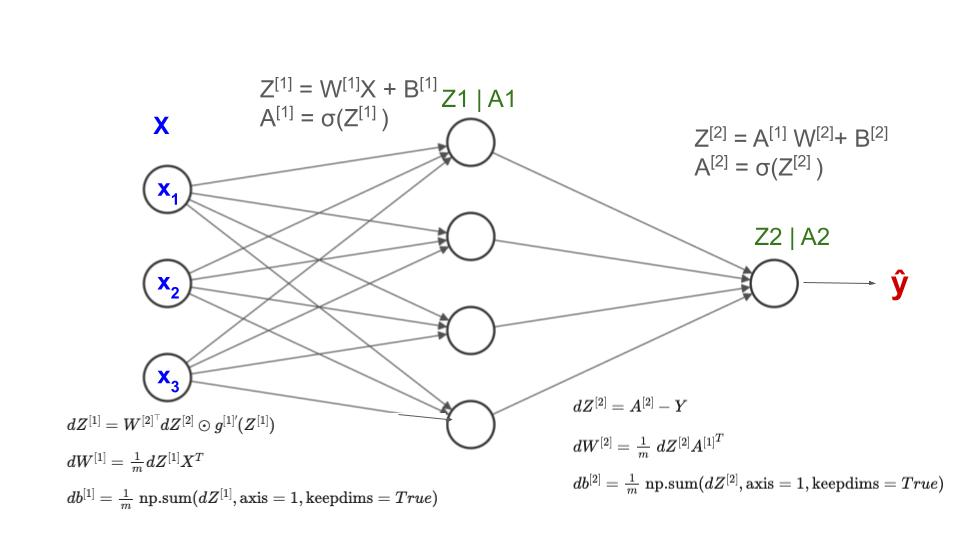

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/refs/heads/master/ml/log-neuron.txt",header=None)

#features
X = df.iloc[:, :2].to_numpy()

#observed values
# always reshape Y labels to size (number of samples, 1) to avoid broadcast problems
Y = df.iloc[:, -1].to_numpy().reshape(-1,1)

In [4]:
print("first five rows X", X[:5,:])

print("\nfirst five rows Y", Y[:5])

print("\nshape of X", X.shape)

first five rows X [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]

first five rows Y [[0]
 [0]
 [0]
 [1]
 [1]]

shape of X (100, 2)


## Forward Propagation

$
Z^{[1]} = XW^{[1]} + b^{[1]}
$

$
A^{[1]} = g^{[1]}(Z^{[1]})
$

$
Z^{[2]} = A^{[1]}W^{[2]} + b^{[2]}
$

$
A^{[2]} = g^{[2]}(Z^{[2]}) = \sigma(Z^{[2]})
$


In [12]:
import numpy as np

def sigmoid(Z):

  return 1 / (1 + np.exp(-Z))

def binary_cross_entropy(y_true, y_pred):
    # Clip predictions to avoid log(0) errors
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


def forward_pass(X,W1,B1,W2,B2):


  Z1 = np.dot(X,W1) + B1
  A1 = sigmoid(Z1)


  #A1 is from the previous layer.  so that connects the two layers
  Z2 = np.dot(A1, W2) + B2
  A2 = sigmoid(Z2)



  return A2, A1


def back_progagation(A2,A1,Y,X, W2,B2,W1, B1):


  lr = 0.5

  m = X.shape[0]

  # Output layer (layer 2)
  dZ2 = A2 - Y  # (m, 1)
  dW2 = np.dot(A1.T, dZ2) / m  # (h, 1)
  dB2 = np.mean(dZ2, axis=0)   # (1,)

  # Hidden layer (layer 1)
  dZ1 = np.dot(dZ2, W2.T) * (A1 * (1 - A1))  # (m, h)
  dW1 = np.dot(X.T, dZ1) / m   # (n, h)
  dB1 = np.mean(dZ1, axis=0)   # (h,)


  # update weights
  W2 = W2 - lr * dW2
  B2 = B2 - lr * dB2
  W1 = W1 - lr * dW1
  B1 = B1 - lr * dB1

  return W2,B2,W1, B1




# shape w1 is (number of features,neurons layer1)
W1 = np.random.randn(2,4)

# shape b1 is (number of neurons,1)
B1 = np.zeros(4)

# 3 neurons in layer 1 with  1 output
W2 = np.random.randn(4, 1)

# number of neurons in layer 2
B2 = np.zeros(1)


count = 5000

while count > 0:

  A2,A1=forward_pass(X,W1,B1,W2,B2 )

  loss = binary_cross_entropy(Y, A2)

  if count % 100 == 0:
    print("Binary cross-entropy loss:", loss)

  W2,B2,W1, B1=back_progagation(A2,A1,Y,X, W2,B2,W1, B1)

  count -= 1


Binary cross-entropy loss: 0.7390421586689578
Binary cross-entropy loss: 0.6730116669571646
Binary cross-entropy loss: 0.6730116669571644
Binary cross-entropy loss: 0.6730116669571639
Binary cross-entropy loss: 0.6730116669571636
Binary cross-entropy loss: 0.6730116669571631
Binary cross-entropy loss: 0.6730116669571623
Binary cross-entropy loss: 0.6730116669571619
Binary cross-entropy loss: 0.6730116669571615
Binary cross-entropy loss: 0.6730116669571609
Binary cross-entropy loss: 0.6730116669571605
Binary cross-entropy loss: 0.6730116669571601
Binary cross-entropy loss: 0.6730116669571596
Binary cross-entropy loss: 0.6730116669571592
Binary cross-entropy loss: 0.6730116669571586
Binary cross-entropy loss: 0.6730116669571583
Binary cross-entropy loss: 0.6730116669571578
Binary cross-entropy loss: 0.6730116669571575
Binary cross-entropy loss: 0.6730116669571571
Binary cross-entropy loss: 0.6730116669571566
Binary cross-entropy loss: 0.6730116669571562
Binary cross-entropy loss: 0.67301


- **First (hidden) layer:**  
  - Pre-activation: `Z1`
  - Activation output: `A1`
  - Gradient w.r.t. Z1: `dZ1`

- **Second (output) layer:**  
  - Pre-activation: `Z2`
  - Activation output: `A2`
  - Gradient w.r.t. Z2: `dZ2`

**The gradients for each step in backwards propagation:**

$$
\begin{align*}
dZ2 &= A2 - Y \\
dW2 &= \frac{1}{m} A1^T dZ2 \\
db2 &= \frac{1}{m} \sum_{i=1}^{m} dZ2_i \\
dZ1 &= (dZ2 W2^T) \odot g^{'}(Z1) \\
dW1 &= \frac{1}{m} X^T dZ1 \\
db1 &= \frac{1}{m} \sum_{i=1}^{m} dZ1_i \\
\end{align*}
$$

**Where:**
- $g^{'}(Z1)$ is the derivative of the activation function. For sigmoid: $g'(Z1) = A1 \times (1 - A1)$.



